#CS114.L22.KHCL
**Thành viên nhóm:**

Nguyễn Lê Anh Quân - 19522081

Phan Thành Nhân - 19521944

Lý Hoàng Thuận - 19522315

## Import library


In [70]:
import numpy as np
import pandas as pd
from sklearn import  linear_model
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

##Get data train and test:


In [2]:
# read data from web with panda read_csv
col_names = ["Size", "Time"]
d_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt",names=col_names)
d_test = pd.read_csv("http://cs.uit.edu.vn/data3.txt",names=col_names)

In [3]:
d_train.head(10)

,Size,Time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977
5,1355574,0.098012
6,725488,0.048238
7,1191887,0.089304
8,4556292,0.378561
9,9989596,0.832734


## Process data

In [4]:
# Train data
x_train = np.array(d_train["Size"]).reshape(-1,1)
y_train = np.array(d_train["Time"])

In [49]:
print(x_train)

[[6083695]
 [1954367]
 [3734185]
 ...
 [9837364]
 [9466593]
 [4080801]]


In [6]:
# Test data
x_test = np.array(d_test["Size"]).reshape(-1,1)
y_test = np.array(d_test["Time"])

In [50]:
print(x_test)

[[37837612]
 [37395246]
 [36610827]
 ...
 [33520323]
 [21243264]
 [21380484]]


In [7]:
np.average(y_test)

2.642811968838527

## Linear regression


In [32]:
#train
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)

#predict
y_pred = lr_model.predict(x_test)

In [33]:
# Mean square error with original data
print('mean square error: ', mean_squared_error(y_test,y_pred))

mean square error:  0.020664949397549082


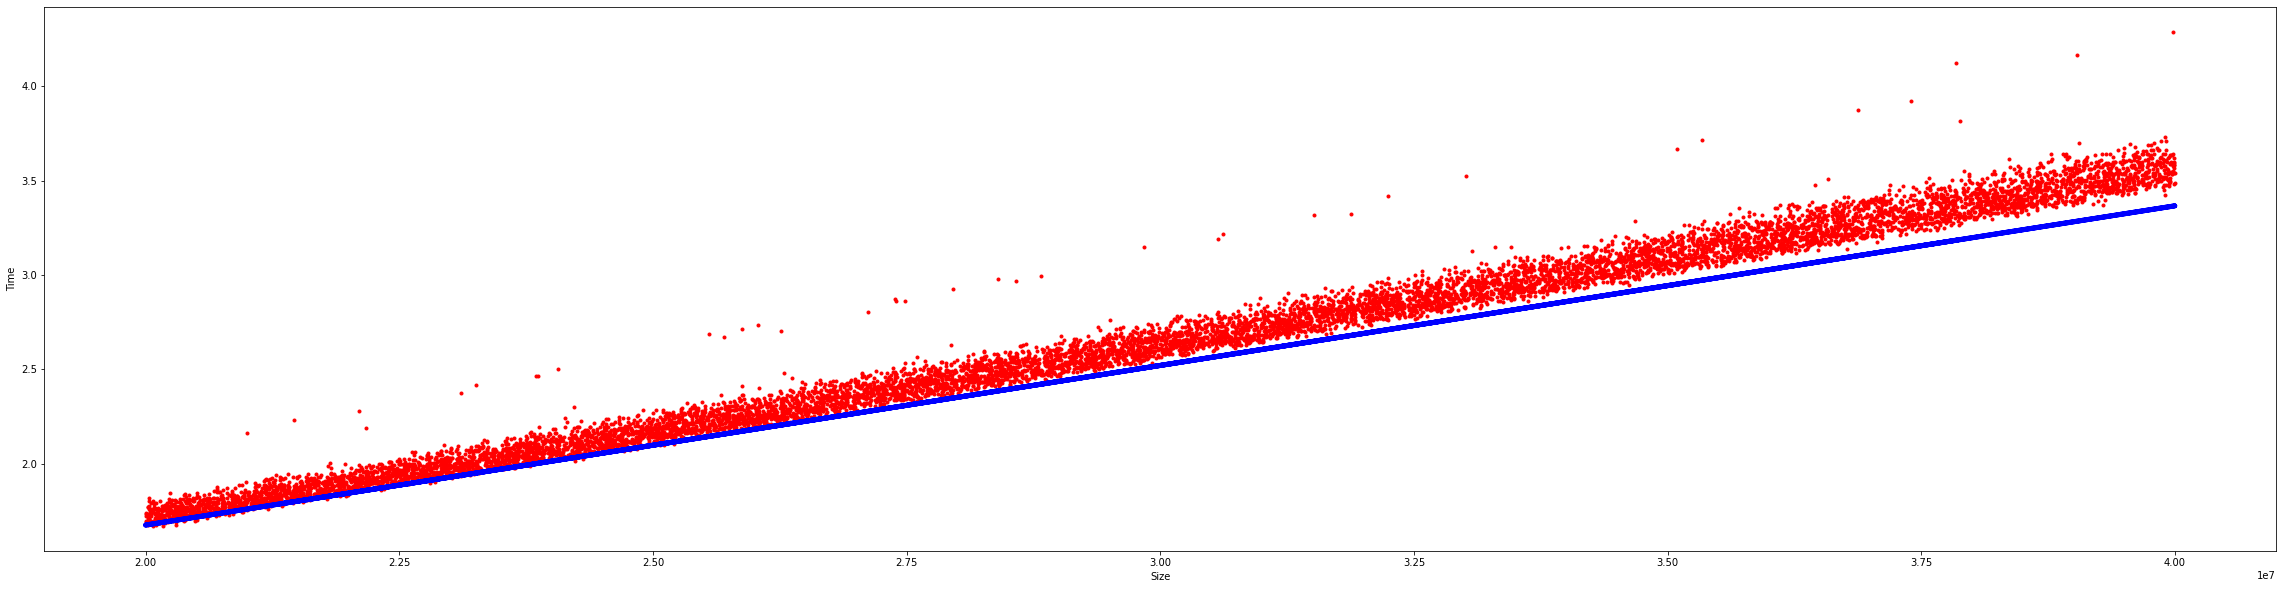

In [36]:
# Plot data and prediction
fig, ax1 = plt.subplots(1, figsize = (40,10))
ax1.plot(x_test, y_test, 'r.' )
ax1.plot(x_test, y_pred,'b', linewidth=5)
ax1.set(xlabel='Size', ylabel='Time')

plt.show()

## Normalize data to see if it get better or not

In [ ]:
# Scale data
scaler = StandardScaler()
new_x_train = scaler.fit_transform(x_train)
new_x_test = scaler.transform(x_test)

In [ ]:
lr_model.fit(new_x_train, y_train)
new_y_pred = lr_model.predict(new_x_test)
print(new_y_pred)
print('mean square error: ', mean_squared_error(y_test,new_y_pred))

[[3.18353889]
 [3.14613375]
 [3.07980564]
 ...
 [2.81848194]
 [1.78037084]
 [1.79197375]]
mean square error:  0.020664949397549173


### Plot to see the different

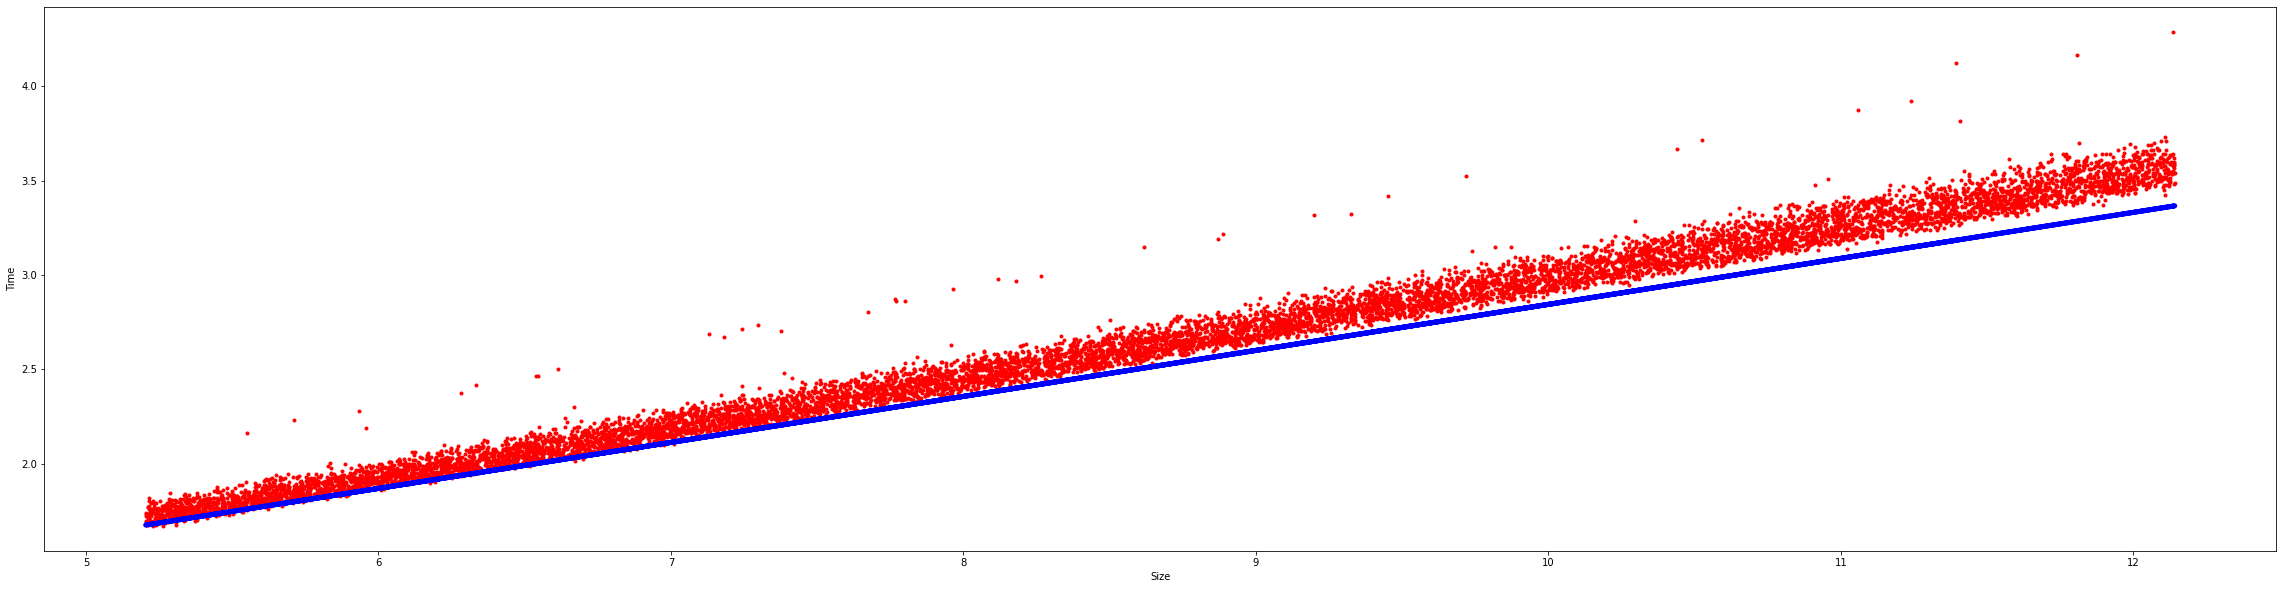

In [ ]:
fig, ax1 = plt.subplots(1, figsize = (40,10))
ax1.plot(new_x_test, y_test, 'r.' )
ax1.plot(new_x_test, new_y_pred,'b', linewidth=5)
ax1.set(xlabel='Size', ylabel='Time')

plt.show()

### Result

Not a big change, only change data range

## Increase data dim

In [63]:
def increaseDim(X_):
  X = np.zeros((np.size(X_),4)) 
  X[:,:1] = X_
  X[:,1:2] = X_**2
  X[:,2:3] = np.log2(X_)
  X[:,3:4] = X_*np.log2(X_)
  
  return X

### Train with new increased dim data

In [69]:
Xs_train = increaseDim(x_train)
print(Xs_train.shape)
Xs_test = increaseDim(x_test)

(71115, 4)


In [65]:
Xs_train2= normalize(Xs_train)
Xs_test2 = normalize(Xs_test)
Y2_train =normalize(y_train.reshape(-1,1))
Y2_test = normalize(y_test.reshape(-1,1))
print(Xs_train2)

[[1.64373789e-07 1.00000000e+00 6.08908336e-13 3.70441260e-06]
 [5.11674624e-07 1.00000000e+00 5.47139531e-12 1.06931144e-05]
 [2.67796052e-07 1.00000000e+00 1.56570184e-12 5.84662034e-06]
 ...
 [1.01653248e-07 1.00000000e+00 2.40042832e-13 2.36138872e-06]
 [1.05634625e-07 1.00000000e+00 2.58595729e-13 2.44802051e-06]
 [2.45049930e-07 1.00000000e+00 1.31871160e-12 5.38139961e-06]]


In [68]:
# train with new train data
lr_model.fit(Xs_train, y_train)

#predict
Ys_pred = lr_model.predict(Xs_test)
print('mean square error: ', mean_squared_error(y_test,Ys_pred))

mean square error:  0.00418119575425957


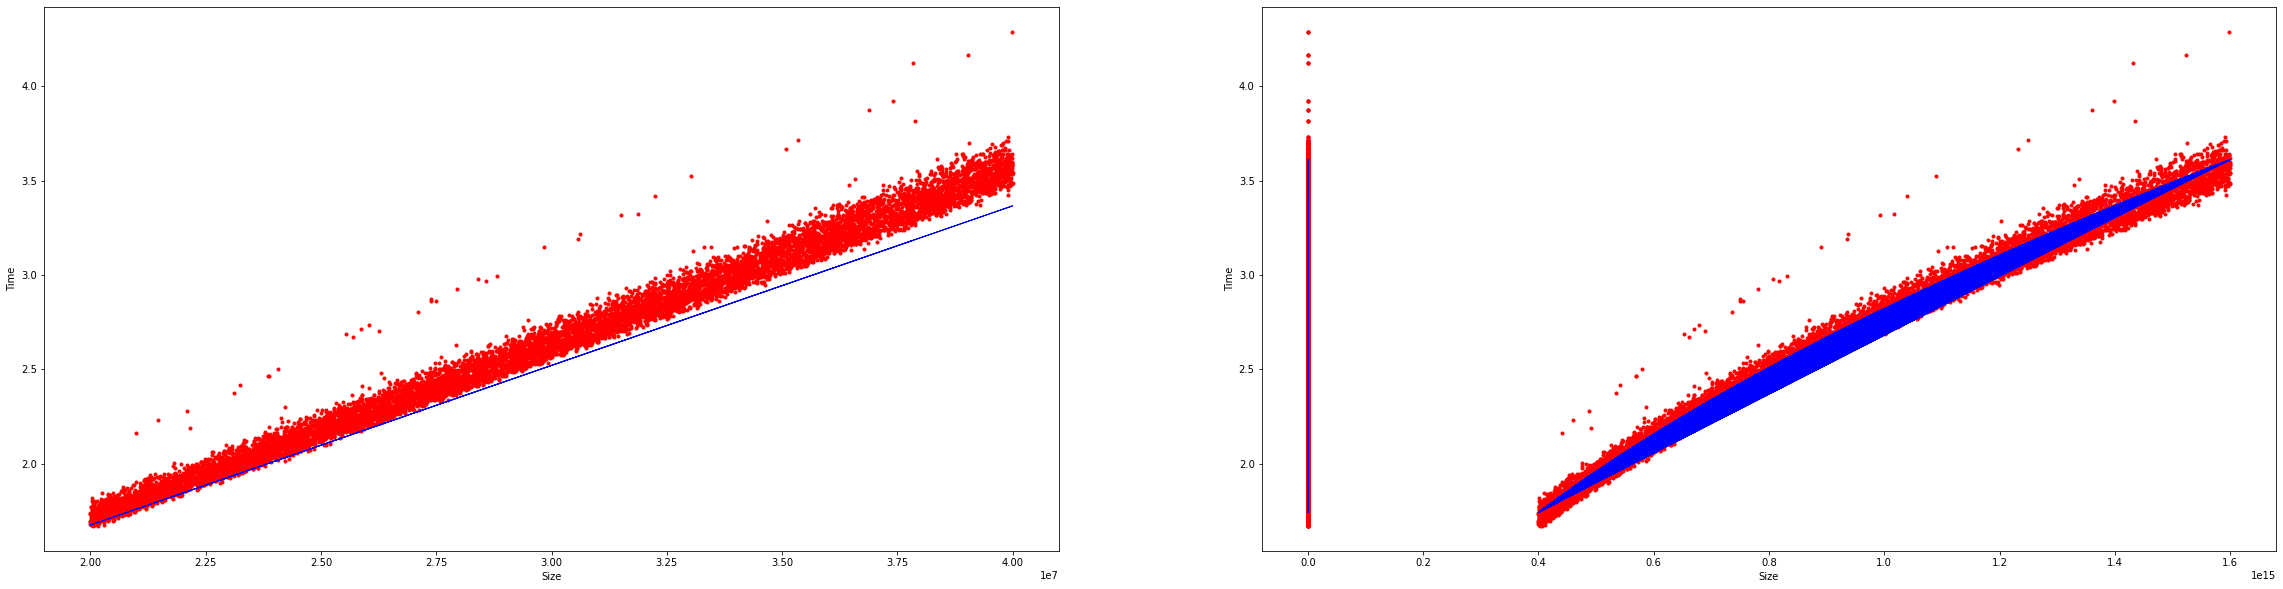

In [67]:
# Plot old data with it predict on axis1 , more dimension data on axis 2
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (40,10))
ax1.plot(x_test, y_test, 'r.' )
ax1.plot(x_test, y_pred,'b', linewidth=1)
ax1.set(xlabel='Size', ylabel='Time')

ax2.plot(Xs_test, y_test, 'r.' )
ax2.plot(Xs_test, Ys_pred,'b', linewidth=1)
ax2.set(xlabel='Size', ylabel='Time')
plt.show()

**Kết quả trước và sau khi tăng chiều dữ liệu**

>**Trước khi tăng chiều dữ liệu**

Giá trị trung bình của y trong tập dữ liệu là: 2.64281

Mean square error sau khi train với x_train thu được: 0.02067

Ta có được sai lệch là: sqrt(0.02067)/2.64281 =  0.054 xấp xỉ 5%



>**Sau khi tăng chiều dữ liệu**

Giá trị trung bình của y trong tập dữ liệu là: 2.64281

Mean square error sau khi train với x_train thu được: 0.00418

Ta có được sai lệch là: sqrt(0.00418)/2.64281 =  0.024 xấp xỉ 2%

>**Kết luận**

Có thể thấy được sau khi tăng chiều dữ liệu bằng thêm vào dữ liệu gốc các cột giá trị: *bình phương X*, *log2 X*, *tích X và log2 X*. Ta thu được kết quả tốt hơn dữ liệu ban đầu.

Tuy nhiên khi thêm vào các cột giá trị như logX, X*logX,.. các giá trị có thể rất nhỏ, gần bằng hoặc bằng 0 nên sẽ xuất hiện các giá trị ảnh hưởng đến mô hình Linear Regression.